<a href="https://colab.research.google.com/github/savyasachishriram/US_Accidents_EDA/blob/main/US_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#US Accidents Exploratory Data Analysis
##Introduction
Exploratory Data Analysis (EDA) is a data analysis technique that uses statistical and visualization techniques to describe data.
<br>Here we shall be using the data from a countrywide car accident dataset, which covers 49 states of the USA. The data we shall be using is for the years 2016 to 2019. The data is not comprehensive of every accident but currently contains about 7 million records out of which we shall be analyzing 2.4 million records for years between 2016 and 2019.
<br>
##Aim
To study the charactersitics of an accident and the factors surrounding it to enable for accident prevention.
<br>People on personal level can make better driving decisions as well as Governments can make better traffic management decisions.
<br>
The aim is to answer certain key questions like:
-TODO
##Procedure
1. Data Preparation and Cleaning
2. Exploratory Data Analysis and Visualization for data regarding:
  -  Location
  -  Time and Date
  -  Weather Conditions
  -  Road Condition and Characteristics
<br>
3. Answering Key Questions with Insights from data analysis.
4. Summary and Conclusion
5. Areas for Future Work

In [1]:
 pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [3]:
data_filename = './us-accidents/US_Accidents_March23.csv'

##Data Preparation and Cleaning
Here we shall be preparing our accidents data for analysis, in addtion to this we shall also get a basic understanding of the data to enable for better handling of it ahead.

In [4]:
import pandas as pd
import numpy as np

In [5]:
!pip install matplotlib seaborn --upgrade --quiet

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
df = pd.read_csv(data_filename, nrows=4000000)

In [9]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [11]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [12]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

In [13]:
year_df

,Year,Cases
7,2023,75549
6,2016,410819
5,2021,451962
4,2020,470250
3,2022,518169
2,2017,655649
1,2019,691934
0,2018,725668


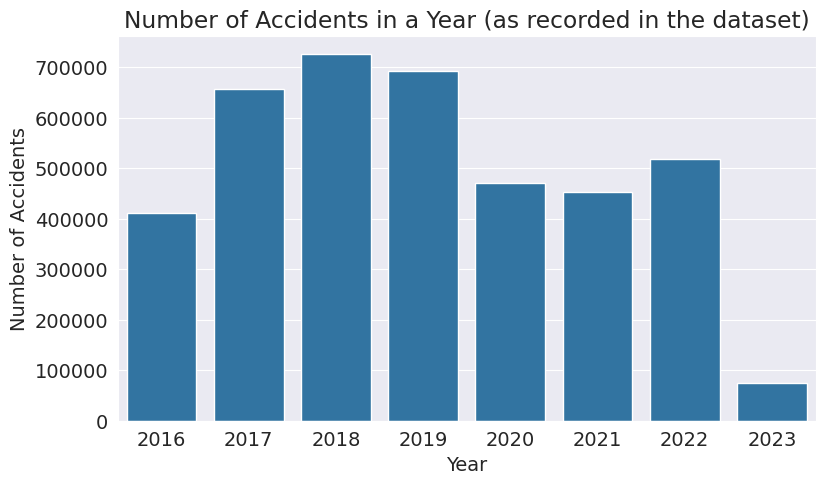

In [14]:
plt.title("Number of Accidents in a Year (as recorded in the dataset)")
plt.ylabel('Number of Accidents'); plt.xlabel('Year')
sns.barplot(y=year_df['Cases'], x=year_df['Year']);

In [15]:
df['Start_Year'] = df['Start_Time'].dt.year

Analyzing accident records between the years 2016 to 2019 for the purposes of this EDA, due to better availability of data for those years. This will allow for better Month and Day of Week analysis.

In [16]:
df = df[df['Start_Year'] < 2020]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,Night,Night,Night,Day,2016
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,True,False,Night,Night,Day,Day,2016
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,Night,Day,Day,Day,2016
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,True,False,Day,Day,Day,Day,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640576,A-3650459,Source1,2,2017-07-30 12:10:49,2017-07-30 18:10:49,33.945040,-118.099300,33.938030,-118.094600,0.554,...,False,False,False,False,False,Day,Day,Day,Day,2017
3640577,A-3650460,Source1,2,2017-07-30 12:57:19,2017-07-30 18:57:19,34.168130,-118.583730,34.168750,-118.592330,0.494,...,False,False,False,False,False,Day,Day,Day,Day,2017
3777794,A-3806081,Source1,2,2018-04-19 09:24:00,2022-07-20 08:44:30,40.894405,-72.470305,40.895327,-72.454050,0.851,...,False,False,False,False,False,Day,Day,Day,Day,2018
3907559,A-3936872,Source1,2,2018-09-28 07:51:00,2022-02-07 18:00:15,37.600951,-77.666960,37.559320,-77.690244,3.146,...,False,False,False,False,False,Day,Day,Day,Day,2018


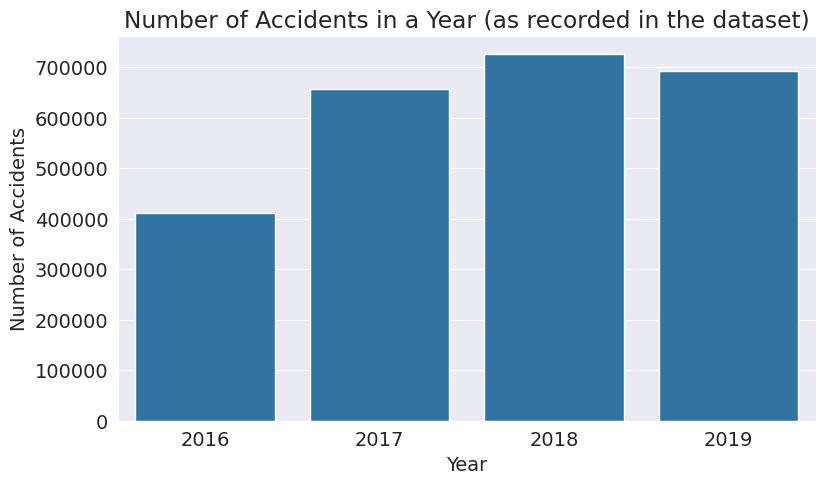

In [56]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)
plt.title("Number of Accidents in a Year (as recorded in the dataset)")
plt.ylabel('Number of Accidents'); plt.xlabel('Year')
sns.barplot(y=year_df['Cases'], x=year_df['Year']);

In [17]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Year
count,2.484070e+06,2.484070e+06,2.484070e+06,237819.000000,237819.000000,2.484070e+06,2.441210e+06,846861.000000,2.438616e+06,2.447457e+06,2.432500e+06,2.105017e+06,738778.000000,2.484070e+06
mean,2.353903e+00,3.622038e+01,-9.408714e+01,36.969266,-95.368246,2.301449e-01,6.282605e+01,50.522120,6.580016e+01,2.987376e+01,9.152427e+00,8.371790e+00,0.023139,2.017684e+03
std,5.058901e-01,4.855022e+00,1.664699e+01,4.946827,17.522039,1.516532e+00,1.865626e+01,25.544441,2.230898e+01,6.175237e-01,2.813439e+00,5.121816e+00,0.255404,1.050743e+00
min,1.000000e+00,2.455527e+01,-1.246238e+02,25.130927,-124.422706,0.000000e+00,-7.780000e+01,-55.100000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.016000e+03
25%,2.000000e+00,3.338615e+01,-1.119869e+02,33.834080,-117.335740,0.000000e+00,5.110000e+01,31.000000,4.900000e+01,2.984000e+01,1.000000e+01,5.000000e+00,0.000000,2.017000e+03
50%,2.000000e+00,3.550777e+01,-8.799319e+01,37.546288,-88.141810,0.000000e+00,6.490000e+01,51.000000,6.800000e+01,2.999000e+01,1.000000e+01,8.000000e+00,0.000000,2.018000e+03
75%,3.000000e+00,4.007977e+01,-8.083643e+01,40.800910,-80.834530,1.000000e-03,7.700000e+01,73.000000,8.500000e+01,3.012000e+01,1.000000e+01,1.150000e+01,0.000000,2.019000e+03
max,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,1.670000e+02,115.000000,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,25.000000,2.019000e+03


In [18]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Start_Year'],
      dtype='object')

In [19]:
!pip install matplotlib seaborn --upgrade --quiet

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##Exploratory Data Analysis and Visualization
We shall be exploring data regarding:
  -  Location
    - City wise
    - State wise
    - Street wise
  -  Time and Date
    - Year wise
    - Month wise
    - Over the Days of a Week
    - Over the Hours of a Day
  -  Weather Conditions
    - Precipitation
    - Temperature
    - Humidity
    - Pressure
    - Wind Chill
    - Wind Speed
    - Visibility Range
  -  Road Condition and Characteristics
    - Conditions like: Presence of Bump, Crossing, Junction, Stop. Traffic Signal etc.


###**Location**
In this dataset, we have different attributes like City, State and even street for each accident records. Here we will analyze these three features based on the no. of cases for each distinct location.

####City Analysis

In [95]:
cities = df.City.unique()
print('Number of cities with atleat one accident recorded between 2016-2019: ',len(cities))

Number of cities with atleat one accident recorded between 2016-2019:  10965


In [23]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Houston          86803
Charlotte        64601
Austin           57919
Dallas           52685
Los Angeles      51352
Raleigh          38394
Atlanta          32159
Oklahoma City    30499
Baton Rouge      29776
Nashville        26361
Miami            25713
Orlando          22868
San Antonio      20998
Seattle          20696
Phoenix          20150
Sacramento       19306
Minneapolis      18158
Omaha            17444
Richmond         17425
Indianapolis     16604
Name: City, dtype: int64

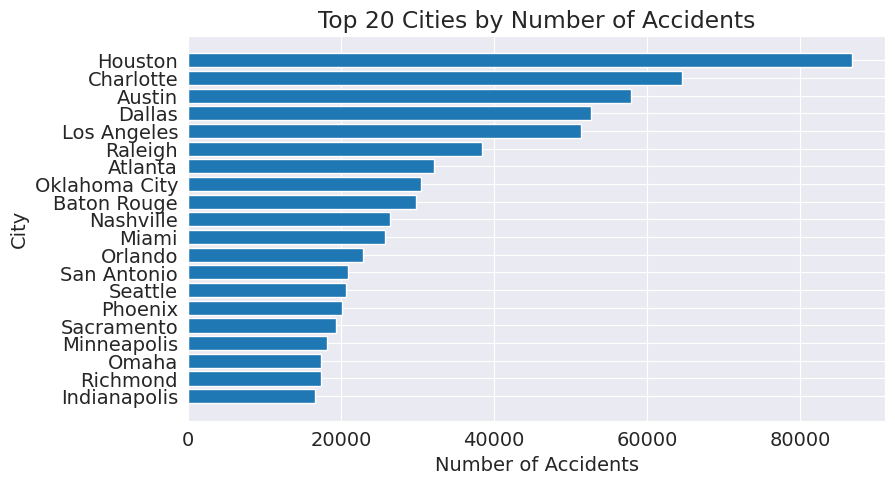

In [111]:
top20_cities=sorted(cities_by_accident[:20], key=None, reverse=False)
top20_city_names = df['City'].value_counts().nlargest(20).index
plt.title("Top 20 Cities by Number of Accidents")
plt.xlabel('Number of Accidents'); plt.ylabel('City')
plt.barh(top20_city_names[::-1],top20_cities);

####State Analysis

In [96]:
states = df.State.unique()
print('Number of states represented in the dataset: ',len(states))

Number of states represented in the dataset:  49


In [26]:
states_by_accident = df.State.value_counts()
states_by_accident[:10]

CA    507618
TX    276580
FL    194500
SC    143052
NC    133097
NY    121316
PA     85965
MI     75949
GA     69683
IL     69352
Name: State, dtype: int64

The State of New York is not represented in the dataset as we see below, even though it is the 4th most populated US State. As a result the most populated US city of New York City is not represented.

In [27]:
'NY' in df.State

False

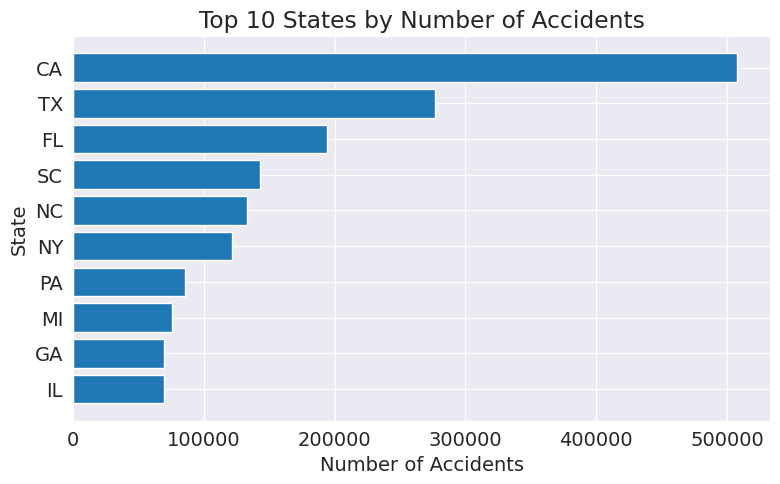

In [28]:
top20_states=sorted(states_by_accident[:10], key=None, reverse=False)
top20_state_names = df['State'].value_counts().nlargest(10).index
plt.title("Top 10 States by Number of Accidents")
plt.xlabel('Number of Accidents'); plt.ylabel('State')
plt.barh(top20_state_names[::-1],top20_states);

####Street Analysis

In [31]:
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})
street_df.head(10)

,Street No.,Cases
0,I-95 N,24427
1,I-5 N,22049
2,I-95 S,19974
3,I-10 E,16750
4,I-10 W,15821
5,I-405 N,13457
6,I-80 W,12834
7,I-75 N,11928
8,I-75 S,11351
9,I-80 E,10986


In [32]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))

In [98]:
streets_by_accident = df.Street.value_counts()
streets_by_accident[:10]

I-95 N     24427
I-5 N      22049
I-95 S     19974
I-10 E     16750
I-10 W     15821
I-405 N    13457
I-80 W     12834
I-75 N     11928
I-75 S     11351
I-80 E     10986
Name: Street, dtype: int64

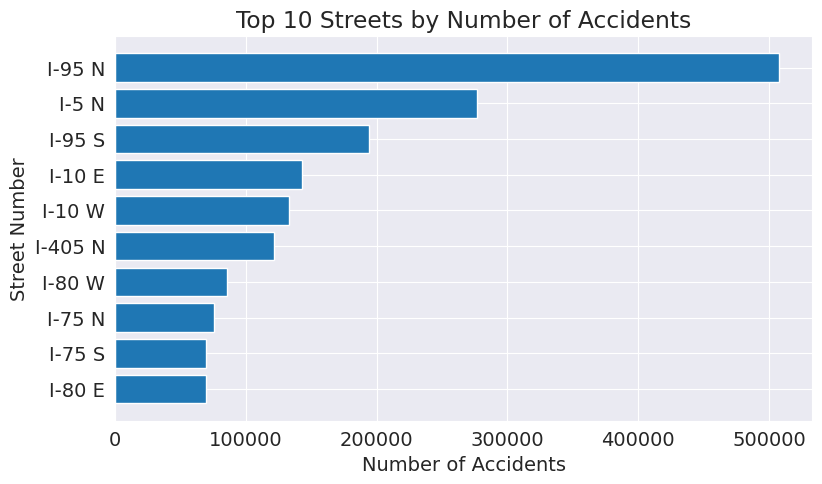

In [99]:
top10_streets=sorted(states_by_accident[:10], key=None, reverse=False)
top10_street_names = df['Street'].value_counts().nlargest(10).index
plt.title("Top 10 Streets by Number of Accidents")
plt.xlabel('Number of Accidents'); plt.ylabel('Street Number')
plt.barh(top10_street_names[::-1],top10_streets);

###**Time**
In this dataset we have Start_Time for the timings of each accident. Start_Time shows start time of the accident in local time zone. We shall use this data to analyse the number of accident over the years, months of a year, days of the week and hours in a day.

In [34]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

####Year Analysis

In [35]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

In [36]:
year_df

,Year,Cases
3,2016,410819
2,2017,655649
1,2019,691934
0,2018,725668


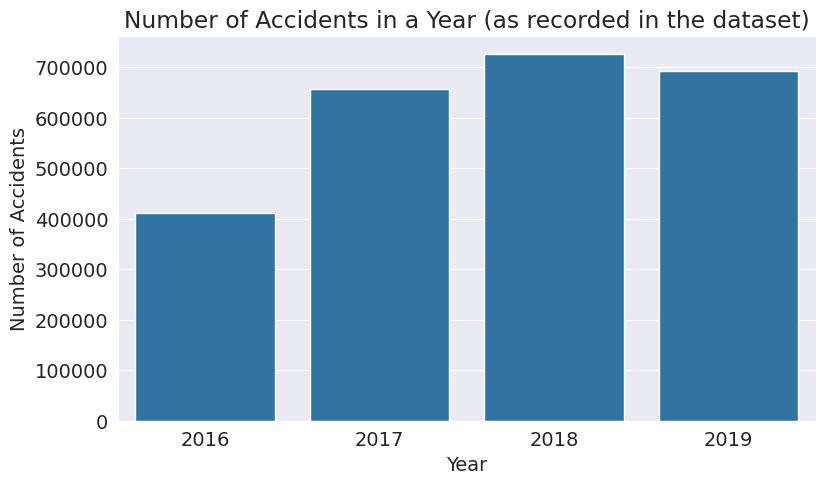

In [37]:
plt.title("Number of Accidents in a Year (as recorded in the dataset)")
plt.ylabel('Number of Accidents'); plt.xlabel('Year')
sns.barplot(y=year_df['Cases'], x=year_df['Year']);

####Month Analysis

In [38]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')
month_names = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
month_df.Month = month_names
month_df

,Month,Cases
10,Jan,177352
11,Feb,167722
9,Mar,179832
7,Apr,185617
8,May,182750
6,Jun,186354
5,Jul,197301
2,Aug,244434
3,Sep,232760
0,Oct,254779


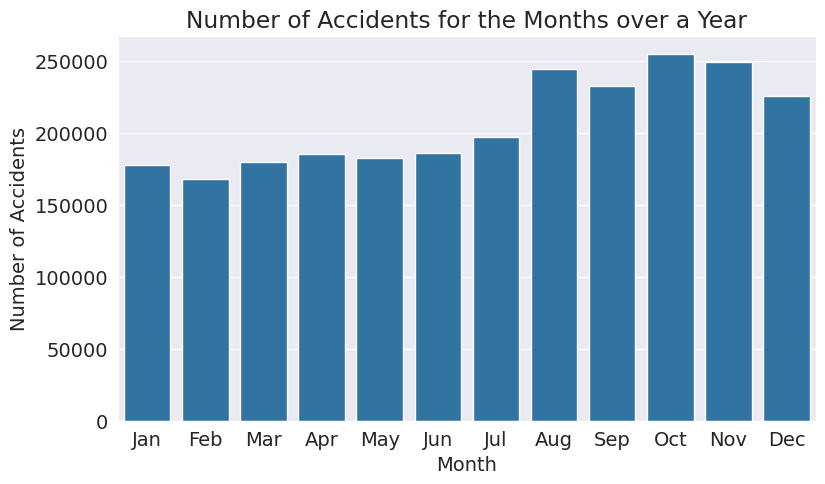

In [39]:
plt.title("Number of Accidents for the Months over a Year")
plt.ylabel('Number of Accidents'); plt.xlabel('Month')
sns.barplot(y=month_df['Cases'], x=month_df['Month']);

####Day of Week Analysis

In [40]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})
day_df.set_index('Day', inplace=True)
order = ["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
day_df = day_df.loc[order]
day_df.reset_index(inplace=True)
day_df

,Day,Cases
0,Monday,428206
1,Tuesday,457135
2,Wednesday,452093
3,Thursday,442906
4,Friday,453788
5,Saturday,133084
6,Sunday,116858


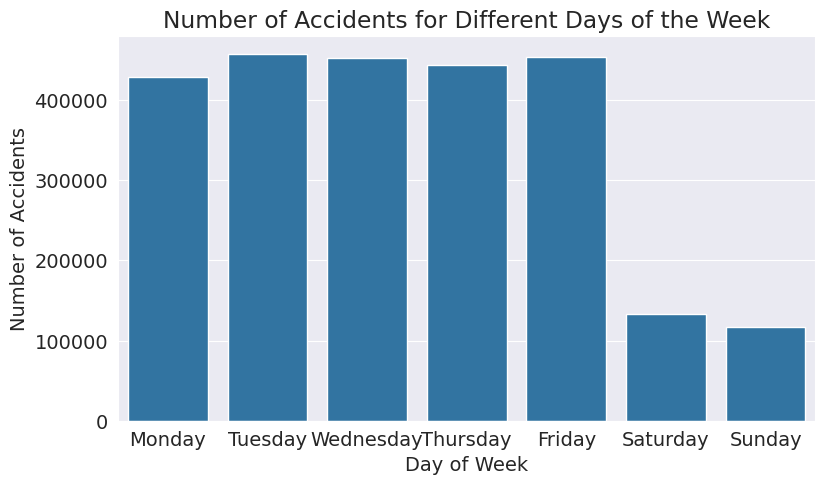

In [41]:
plt.title("Number of Accidents for Different Days of the Week")
plt.ylabel('Number of Accidents'); plt.xlabel('Day of Week')
sns.barplot(y=day_df['Cases'], x=day_df['Day']);

####Hour of Day Analysis

In [42]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')
hour_df

,Hours,Cases
20,0,14934
23,1,12515
21,2,13043
22,3,12905
16,4,47249
14,5,70904
5,6,146602
1,7,242423
0,8,251453
4,9,151133


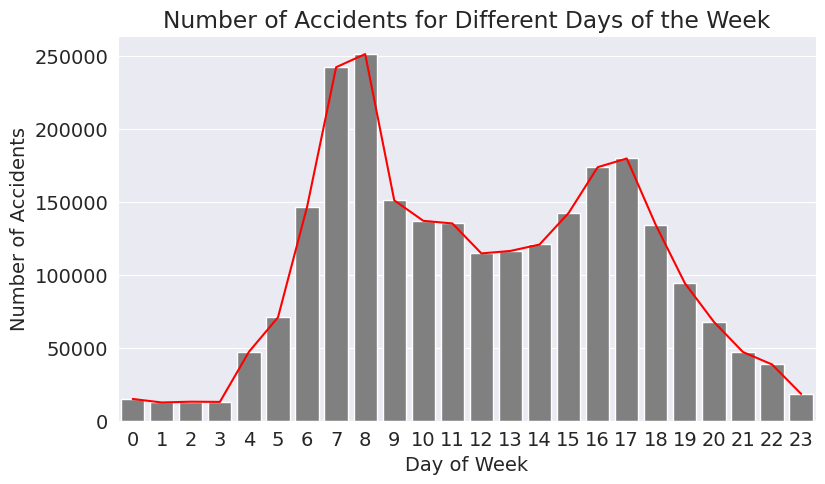

In [116]:
plt.title("Number of Accidents for Different Days of the Week")
plt.ylabel('Number of Accidents'); plt.xlabel('Day of Week')
sns.lineplot(data = hour_df, x='Hours', y='Cases',color='red')
sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], color='grey');

TODO - Make heat map for days

###**Weather Conditions**
Here we shall be analyzing the the number of accidents in relation to weather conditions like: precipitation, temperature, humidity, pressure, wind chill, wind speed and visibility range.

We have created certain functions for generating intervals and for visualization purposes:

In [44]:
def generate_intervals_labels(attribute, split, gap):
    df_2=df.dropna(subset=[attribute])
    var_min = min(df_2[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):

        lower_limit = int(var_min+((i-1)*gap))

        if i==split:
            upper_limit = int(max(df_2[attribute]))
        else:
            upper_limit = int(var_min + (i*gap))

        #intervals
        intervals.append(upper_limit)

        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)

    return intervals, labels

In [53]:
def generate_intervals_labels_manual(attribute, split, gap, lower):
    df_2=df.dropna(subset=[attribute])
    var_min = lower
    intervals = [(var_min)]
    labels = []
    for i in range(1, split+1):

        lower_limit = (var_min+((i-1)*gap))

        if i==split:
            upper_limit = (max(df_2[attribute]))
        else:
            upper_limit = (var_min + (i*gap))

        #intervals
        intervals.append(upper_limit)

        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)

    return intervals, labels

In [69]:
def generate_intervals_labels_manual2(attribute, split, lower, upper):
    df_2=df.dropna(subset=[attribute])
    var_min = lower
    intervals = [(var_min)]
    labels = []
    gap=(upper+lower)/split
    for i in range(1, split+1):

        lower_limit = (var_min+((i-1)*gap))

        if i==split:
            upper_limit = (upper)
        else:
            upper_limit = (var_min + (i*gap))

        #intervals
        intervals.append(upper_limit)

        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)

    return intervals, labels

In [80]:
def Feature_Bin_Plot(dataframe, attribute, intervals, labels, fig_size, font_size, y_lim, adjust, title):

    new_df = dataframe.copy()
    new_df = new_df.dropna(subset=[attribute])
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_df[xlabel] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')

    count,max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1

    total = len(new_df[xlabel])
    plt.figure(figsize=fig_size)

    ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins']);

    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')

    plt.title(title, size=20, color='grey')
    plt.ylim(y_lim)

    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)

    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)

####Precipitation Analysis

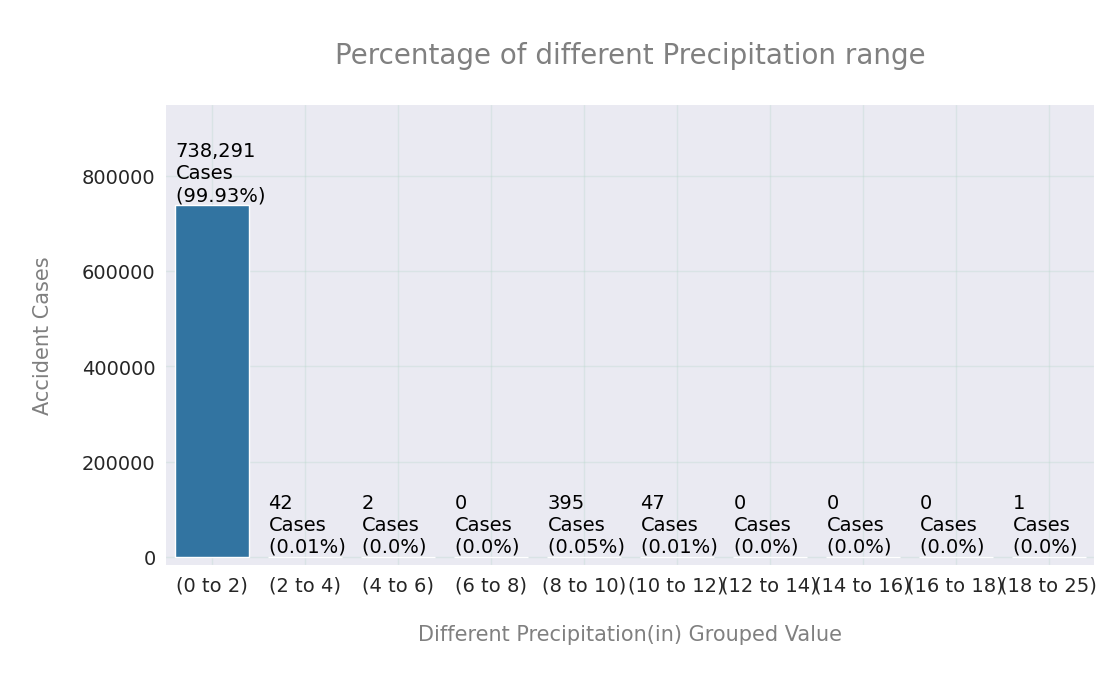

In [93]:
Precipitation_intervals, Precipitation_labels = generate_intervals_labels('Precipitation(in)', 10, 2)

Feature_Bin_Plot(df, 'Precipitation(in)', Precipitation_intervals, Precipitation_labels, (12, 6), 14, (-20000, 950000), [0.01, 10000], '\nPercentage of different Precipitation range\n')

####Temperature Analysis

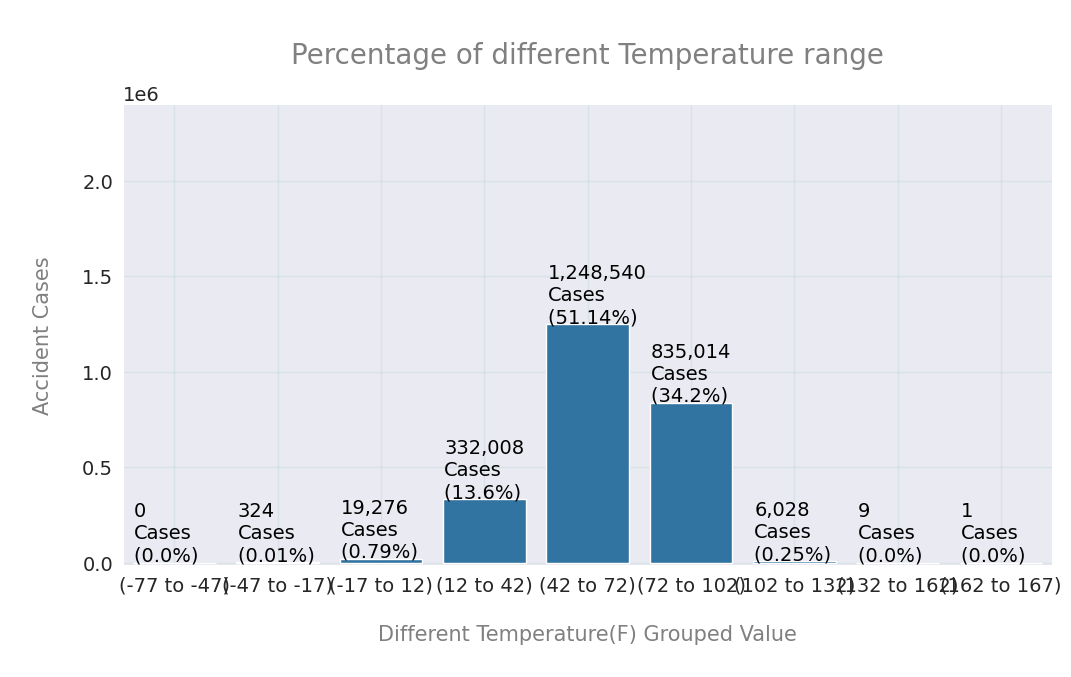

In [82]:
temp_intervals, temp_labels = generate_intervals_labels('Temperature(F)', 9, 30)

Feature_Bin_Plot(df, 'Temperature(F)', temp_intervals, temp_labels, (12, 6), 14, (-20000, 2400000), [0.01, 10000], '\nPercentage of different Temperature range\n')

####Humidity Analysis

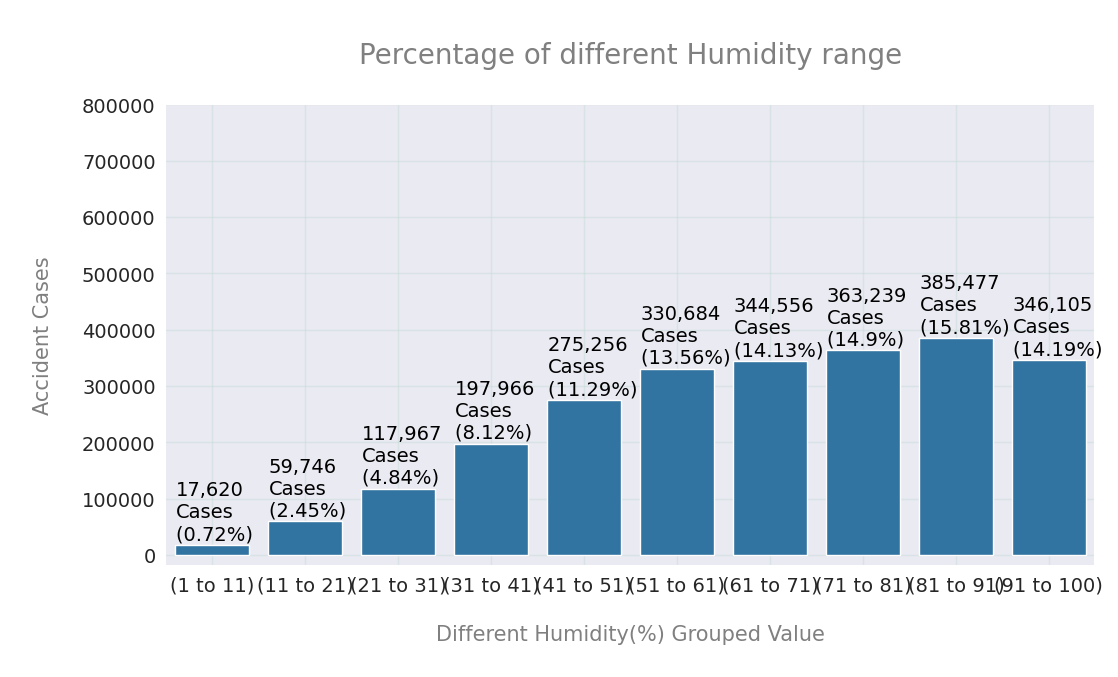

In [83]:
Humidity_intervals, Humidity_labels = generate_intervals_labels('Humidity(%)', 10, 10)

Feature_Bin_Plot(df, 'Humidity(%)', Humidity_intervals, Humidity_labels, (12, 6), 14, (-20000, 800000), [0.01, 10000], '\nPercentage of different Humidity range\n')

####Pressure Analysis

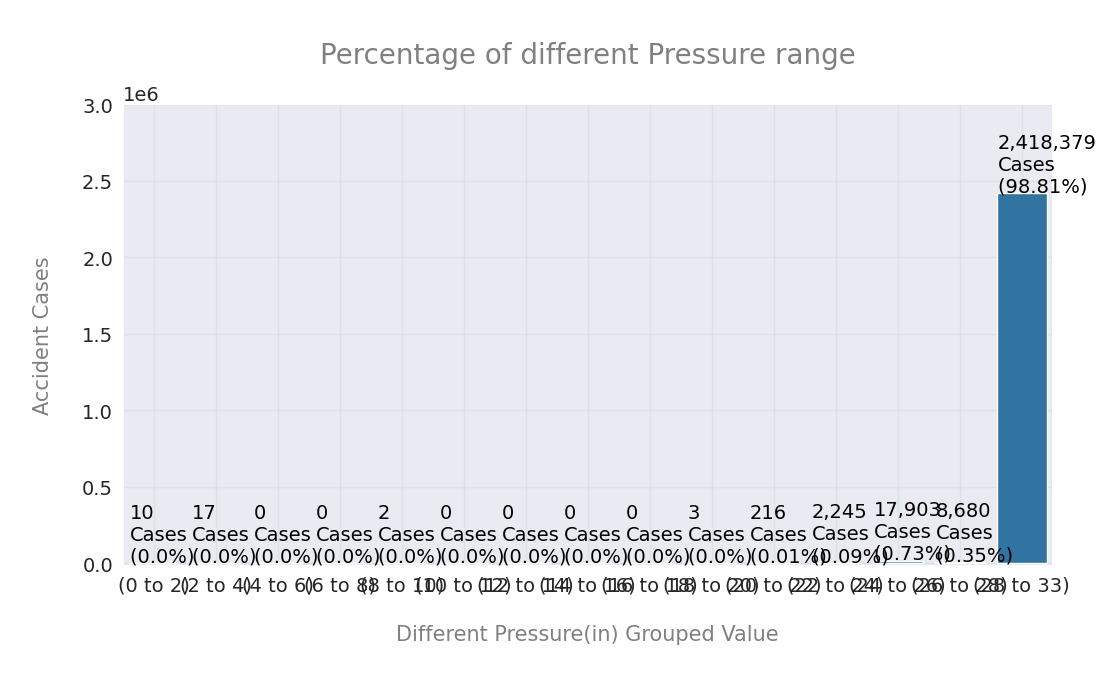

In [84]:
Pressure_intervals, Pressure_labels = generate_intervals_labels('Pressure(in)', 15, 2)

Feature_Bin_Plot(df, 'Pressure(in)', Pressure_intervals, Pressure_labels, (12, 6), 14, (-20000, 3000000), [0.01, 10000], '\nPercentage of different Pressure range\n')

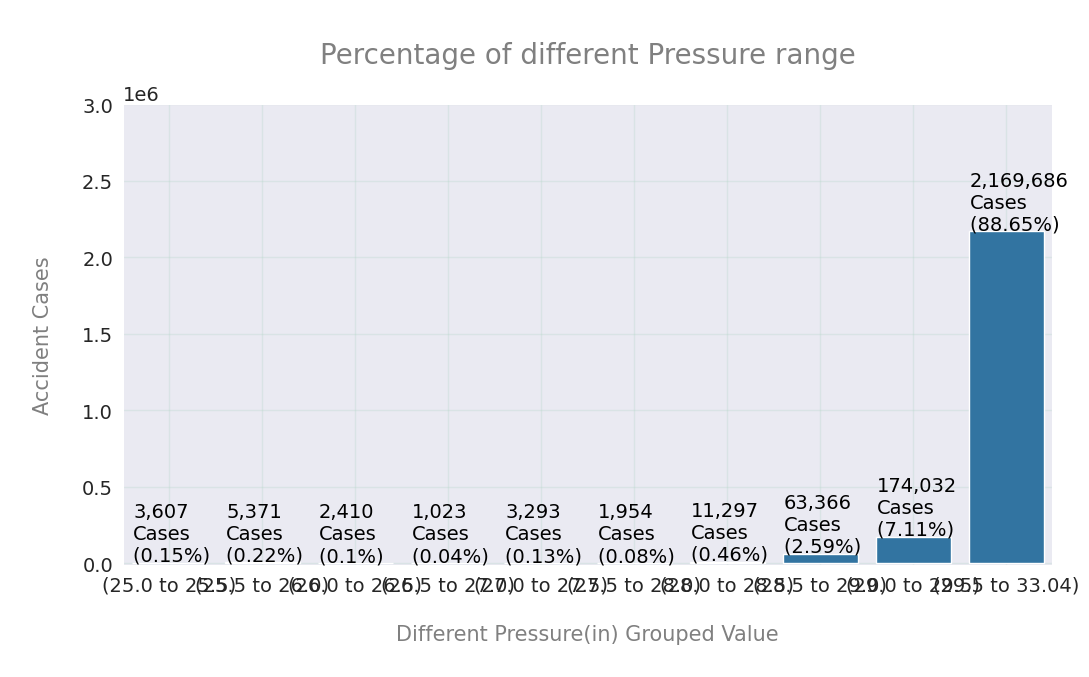

In [85]:
Pressure_intervals, Pressure_labels = generate_intervals_labels_manual('Pressure(in)', 10, 0.5, 25)

Feature_Bin_Plot(df, 'Pressure(in)', Pressure_intervals, Pressure_labels, (12, 6), 14, (-20000, 3000000), [0.01, 10000], '\nPercentage of different Pressure range\n')

####Wind Chill Analysis

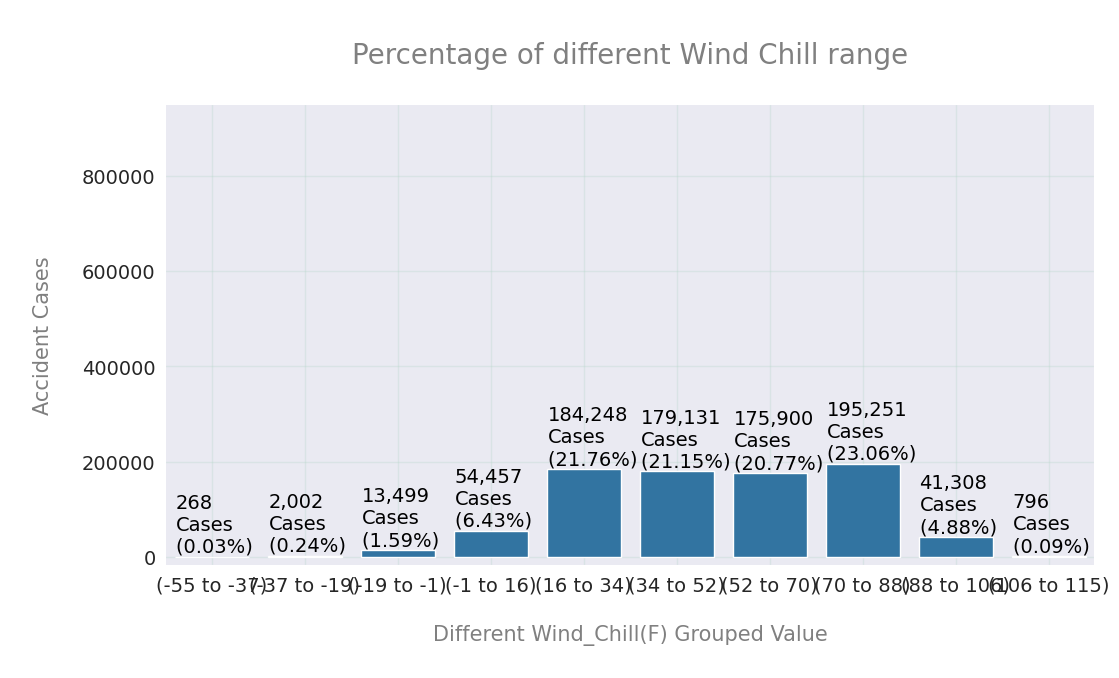

In [86]:
Wind_Chill_intervals, Wind_Chill_labels = generate_intervals_labels('Wind_Chill(F)', 10, 18)

Feature_Bin_Plot(df, 'Wind_Chill(F)', Wind_Chill_intervals, Wind_Chill_labels, (12, 6), 14, (-20000, 950000), [0.01, 10000], '\nPercentage of different Wind Chill range\n')

####Wind Speed Analysis

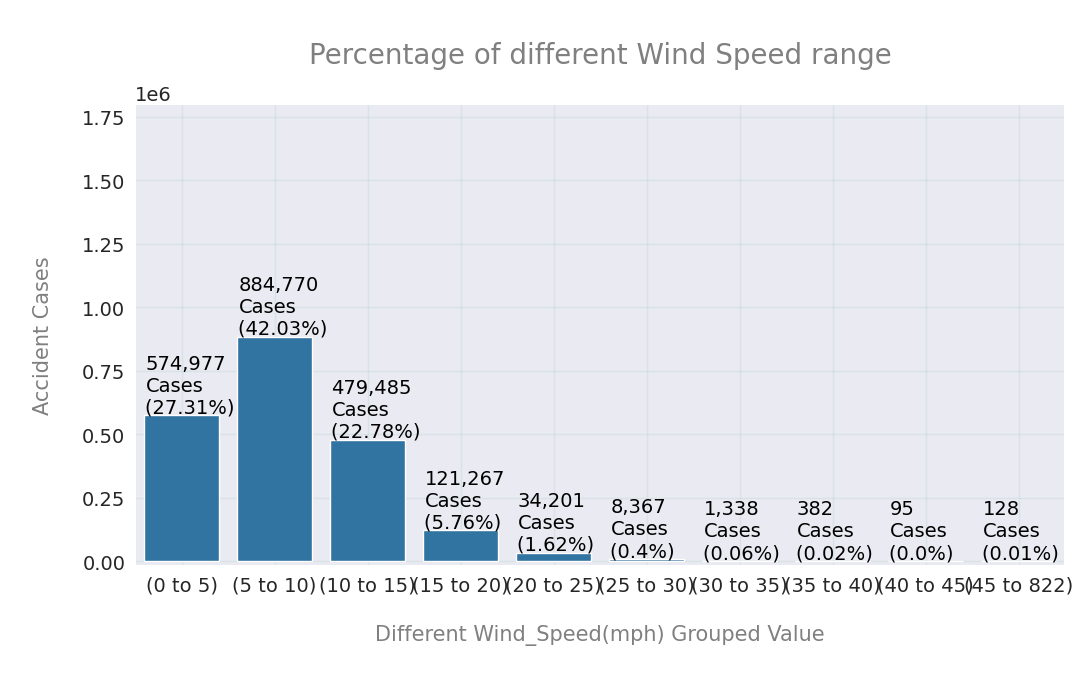

In [87]:
Wind_Speed_intervals, Wind_Speed_labels = generate_intervals_labels('Wind_Speed(mph)', 10, 5)

Feature_Bin_Plot(df, 'Wind_Speed(mph)',Wind_Speed_intervals, Wind_Speed_labels, (12, 6), 14, (-20000, 1800000), [0.01, 10000], '\nPercentage of different Wind Speed range\n')

####Visibility Range Analysis

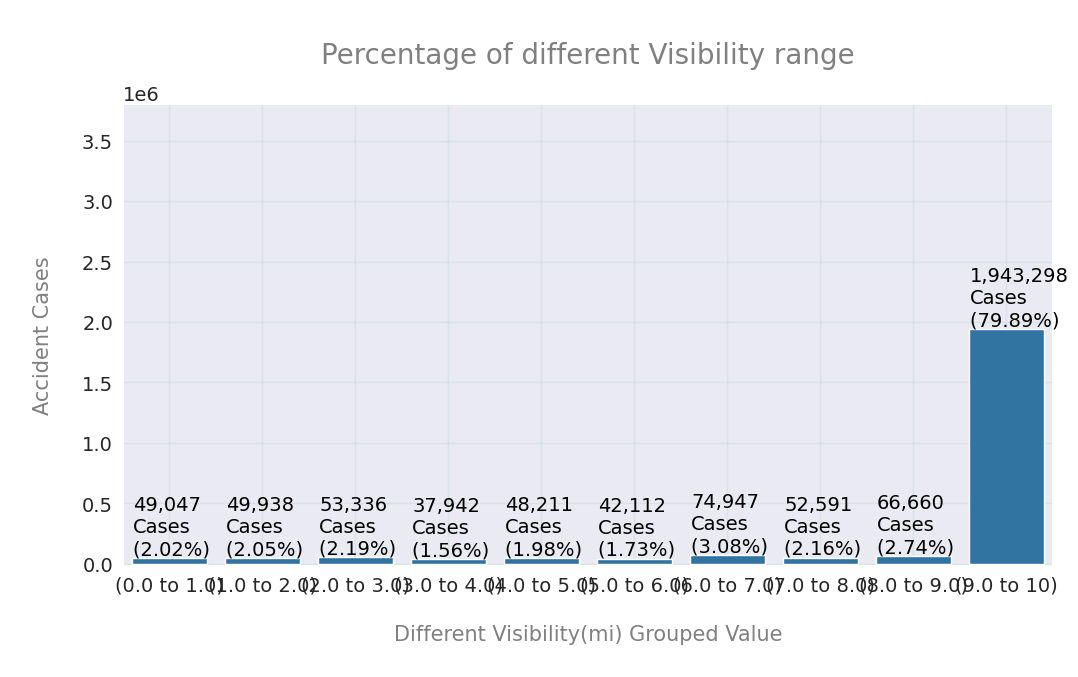

In [88]:
Visibility_intervals, Visibility_labels = generate_intervals_labels_manual2('Visibility(mi)', 10, 0, 10)

Feature_Bin_Plot(df, 'Visibility(mi)', Visibility_intervals, Visibility_labels, (12, 6), 14, (-20000, 3800000), [0.01, 30000], '\nPercentage of different Visibility range\n')

####Weather Condition Description Analysis
Here we analyze the records on the basis of the description given regarding the weather condition at the time of the accident.

In [71]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts()).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})
weather_condition_df = weather_condition_df.head(20)
weather_condition_df

,Weather_Condition,Cases
0,Clear,713704
1,Mostly Cloudy,351123
2,Overcast,331962
3,Partly Cloudy,247297
4,Fair,234892
5,Scattered Clouds,181533
6,Light Rain,117689
7,Cloudy,83061
8,Light Snow,32321
9,Haze,27481


(0.0, 1100000.0)

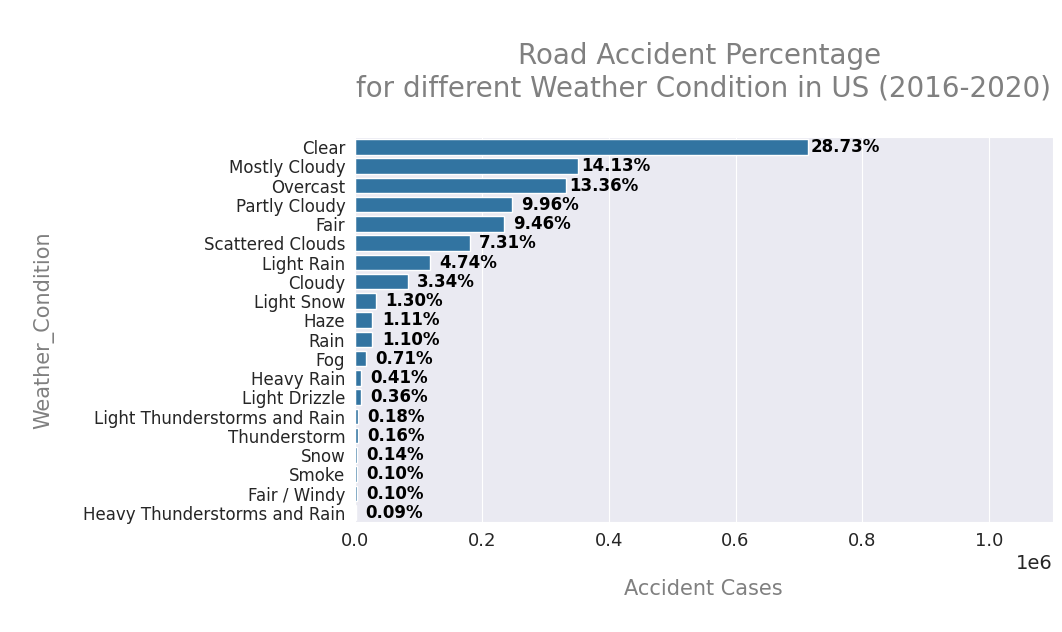

In [72]:
ax=sns.barplot(x=weather_condition_df['Cases'], y=weather_condition_df['Weather_Condition'])

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()+60000, p.get_y()+0.4,'{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=12, color='black', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nWeather_Condition\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 1100000)

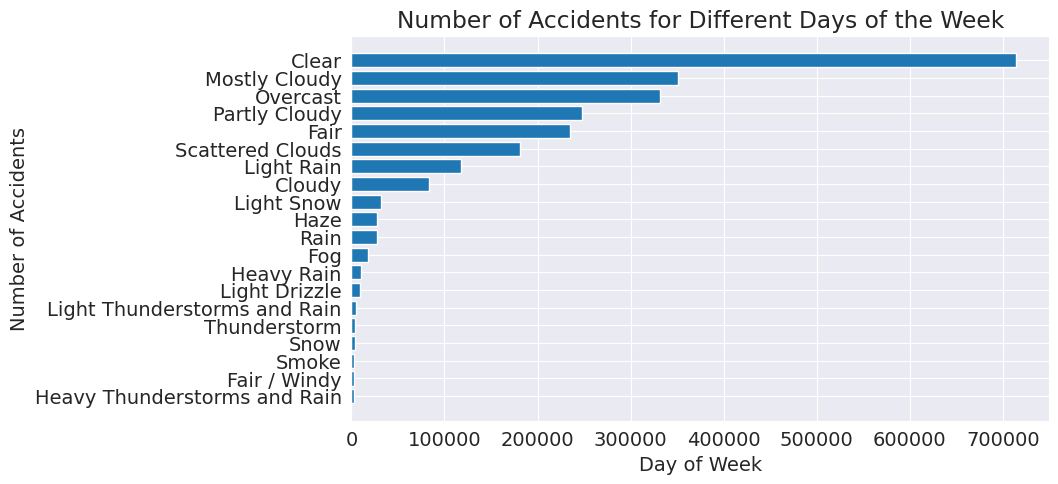

In [73]:
plt.title("Number of Accidents for Different Days of the Week")
plt.ylabel('Number of Accidents'); plt.xlabel('Day of Week')
plt.barh(weather_condition_df['Weather_Condition'][::-1],weather_condition_df['Cases'][::-1]);

###**Road Condition**
Here we analyze the road condition at the spot of the accident. Here the road conditions being analyzed involve the surrounding characteristics like traffic signal and junctions that affect the flow of traffic.

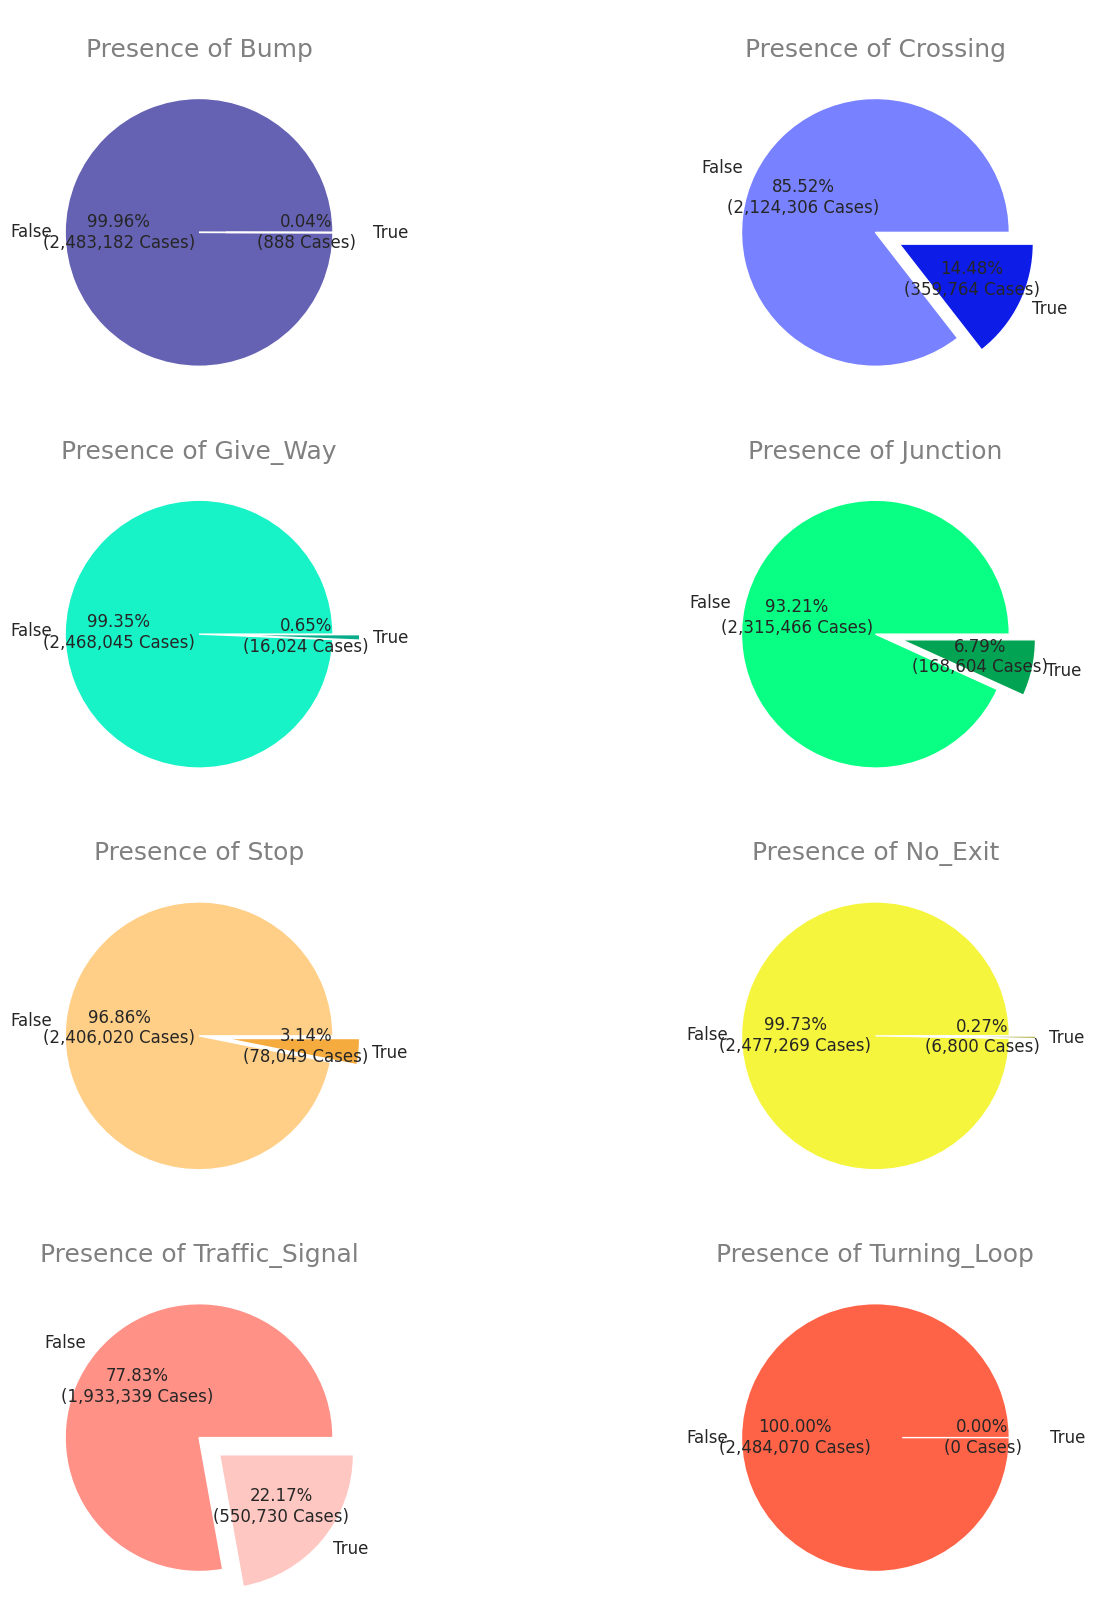

In [74]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:

    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']



    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')

    count += 1

##Answering Key Questions with Insights from data analysis.


##Summary and Conclusion


##Areas for Future Work